In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

folder = '/content/drive/My Drive/LaboDatos_1C2022/LaboDatos2022/PrimeraEjercitacion'
df_matches, df_players = pd.read_csv(f'{folder}/WorldCupMatches.csv'), pd.read_csv(f'{folder}/WorldCupPlayers.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Primera consigna

Vamos a arrancar con el DataFrame correspondiente a cada mundial. Primero visualizamos las columnas, algunos datos y limpiamos datos nulos.

In [ ]:
print(df_matches.columns)
print(df_matches.shape)

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'],
      dtype='object')
(4572, 20)


In [ ]:
df_matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


Buscamos datos nulos. En caso de encontrarlos, nos fijamos si podemos salvar los índices que los poseen o hay que removerlos.

In [ ]:
print(df_matches.isnull().any())
print(df_matches.isnull().any().sum())

Year                    True
Datetime                True
Stage                   True
Stadium                 True
City                    True
Home Team Name          True
Home Team Goals         True
Away Team Goals         True
Away Team Name          True
Win conditions          True
Attendance              True
Half-time Home Goals    True
Half-time Away Goals    True
Referee                 True
Assistant 1             True
Assistant 2             True
RoundID                 True
MatchID                 True
Home Team Initials      True
Away Team Initials      True
dtype: bool
20


In [ ]:
df_matches[df_matches.isnull().any(axis=1)]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
823,2014.0,30 Jun 2014 - 17:00,Round of 16,Estadio Beira-Rio,Porto Alegre,Germany,2.0,1.0,Algeria,Germany win after extra time,NaN,0.0,0.0,RICCI Sandro (BRA),DE CARVALHO Emerson (BRA),VAN GASSE Marcelo (BRA),255951.0,300186460.0,GER,ALG
841,2014.0,30 Jun 2014 - 17:00,Round of 16,Estadio Beira-Rio,Porto Alegre,Germany,2.0,1.0,Algeria,Germany win after extra time,NaN,0.0,0.0,RICCI Sandro (BRA),DE CARVALHO Emerson (BRA),VAN GASSE Marcelo (BRA),255951.0,300186460.0,GER,ALG
852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vemos que de las veinte filas con datos faltantes, a dos sólo les faltan la asistencia a los estadios (campo "Attendance"), mientras que las 3720 restantes sólo poseen datos nulos. Removemos éstas últimas.

In [ ]:
# Ponemos la keyword how=all para que solo remueva las filas que tienen todos sus valores iguales a NaN
df_matches.dropna(how='all', inplace=True)
df_matches.shape

(852, 20)

Además vemos que las 2 entradas con restantes con datos faltantes están repetidas. Eso nos da una pista de que puede haber más entradas repetidas. Miremos eso antes de quitar los NaN restantes. Usamos la columna "MatchID".

In [ ]:
print(sum(df_matches['MatchID'].value_counts() != 1))
df_matches['MatchID'].value_counts()

16


300186497.0    2
300186502.0    2
300186487.0    2
300186491.0    2
300186462.0    2
              ..
2197.0         1
2246.0         1
2224.0         1
2408.0         1
201.0          1
Name: MatchID, Length: 836, dtype: int64

Como vemos, hay 16 partidos repetidos. Los eliminamos. Además, una busqueda rápida en Google nos dice que la asistencia al partido GER-ALG del mundial 2014 fue de 43.063 espectadores (https://en.wikipedia.org/wiki/2014_FIFA_World_Cup).

In [ ]:
df_matches.drop_duplicates(subset='MatchID', inplace=True)
df_matches.loc[823, 'Attendance'] = 43063

Con el DataFrame sin valores faltantes ni repetidos, pasamos a la primera consigna: Armar un ranking de los mundiales por cantidad de goles en promedio y graficarlo.

Para eso comenzamos creando una columna que sea goles por partido.

In [ ]:
df_matches['Match Goals'] = df_matches['Home Team Goals'] + df_matches['Away Team Goals']
df_matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Match Goals
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,5.0
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,...,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,3.0
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,...,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,3.0
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,...,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,4.0
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,...,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,1.0


In [ ]:
# Miramos la estadística de los goles agrupando por mundial
df_matches.groupby(['Year'])['Match Goals'].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
1930.0,18.0,3.888889,2.272311,1.0,3.00,4.0,4.75,9.0
1934.0,17.0,4.117647,1.932691,1.0,3.00,4.0,5.00,8.0
1938.0,18.0,4.666667,2.400980,2.0,3.00,4.0,6.00,11.0
1950.0,22.0,4.000000,2.070197,1.0,2.25,4.0,5.00,8.0
1954.0,26.0,5.384615,2.899337,1.0,3.25,5.0,7.00,12.0
1958.0,35.0,3.600000,2.341442,0.0,2.00,3.0,4.00,10.0
1962.0,32.0,2.781250,1.995711,0.0,1.00,3.0,4.00,8.0
1966.0,32.0,2.781250,1.679754,0.0,2.00,3.0,3.25,8.0
1970.0,32.0,2.968750,2.086583,0.0,1.00,3.0,5.00,7.0


Ahora armamos una serie ordenada por valores medios que nos sirve tanto para el ranking como para graficar.

In [ ]:
df_goals = pd.DataFrame({'mean': df_matches.groupby(['Year'])['Match Goals'].mean()})
df_goals.sort_values(by='mean', inplace=True, ascending=False)

# Nuestro Ranking está dado por los ínices de nuestra serie
print(*[f'{idx + 1}°   {int(x)}' if idx in range(9) else f'{idx + 1}°  {int(x)}' for idx, x in enumerate(df_goals.index)], sep='\n')

1°   1954
2°   1938
3°   1934
4°   1950
5°   1930
6°   1958
7°   1970
8°   1982
9°   1962
10°  1966
11°  1994
12°  1978
13°  1998
14°  2014
15°  1974
16°  1986
17°  2002
18°  2006
19°  2010
20°  1990


Finalizamos la consigna graficando un plot bar de df_goals.

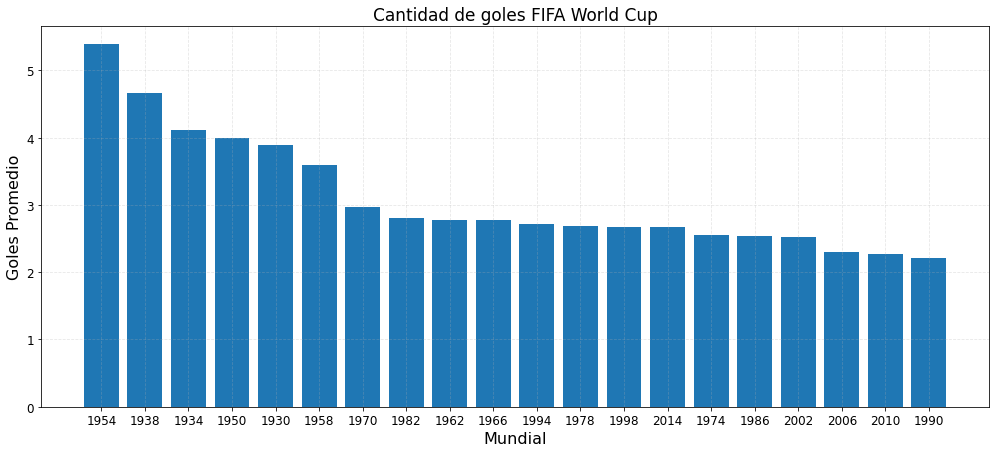

In [ ]:
# Generamos nuestros ticks
x = [str(int(x)) for x in df_goals.index]

# Graficamos 
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(17,7))

ax.grid(linestyle='dashed', alpha=0.3)
ax.bar(range(len(x)),
       'mean', 
       data=df_goals, 
       tick_label = x)
ax.set_title('Cantidad de goles FIFA World Cup', size=17)
ax.set_xlabel('Mundial', size = 16)
ax.set_ylabel('Goles Promedio', size = 16)
ax.tick_params(axis='both', which='major', labelsize=12)

Podemos ver que hasta 1958 el promedio de gol era más de tres goles por partido -con más de 5 en el '54, una locura-, luego de esa fecha la cantidad de goles se estabiliza y fluctua entre 2 y 3 goles por partido. Vale remarcar que la defensa de 4 jugadores se implementó recién el la década del 60, antes se defendía con 2 y se atacaba con 5!

### Segunda consigna

Para buscar los países que más ganaron por penales, tenemos en cuenta que esta definición recién se implemento para el Mundial de Mexico 1970. Además la fase de grupos no cuenta con definición por penales.

In [ ]:
df_penalty = df_matches.loc[df_matches['Year']>=float(1970)]
df_penalty['Year'].value_counts()

1998.0    64
2002.0    64
2006.0    64
2010.0    64
2014.0    64
1982.0    52
1986.0    52
1990.0    52
1994.0    52
1974.0    38
1978.0    38
1970.0    32
Name: Year, dtype: int64

In [ ]:
idx = df_penalty['Stage'].map(lambda df: not df.startswith('Group'))
df_penalty = df_penalty[idx]
df_penalty['Stage'].value_counts()

Round of 16                 64
Quarter-finals              36
Semi-finals                 20
Final                       12
Match for third place        9
Third place                  2
Play-off for third place     1
Name: Stage, dtype: int64

Ahora agrupamos por paises y buscamos las definiciones por penales en la columna "Win Conditions".

In [ ]:
# Todos los eventos
df_penalty['Win conditions'].value_counts()

                                                 95
Italy win after extra time                        3
Argentina win after extra time                    3
Win on Golden Goal                                3
Belgium win after extra time                      2
France win on penalties (3 - 4)                   2
Germany win after extra time                      2
Brazil win on penalties (3 - 2)                   2
France win after extra time                       2
England win after extra time                      2
Netherlands win on penalties (4 - 3)              1
Portugal win on penalties (1 - 3)                 1
Korea Republic win on penalties (3 - 5)           1
Ukraine win on penalties (0 - 3)                  1
Germany win on penalties (4 - 2)                  1
Ghana win after extra time                        1
Italy win on penalties (5 - 3)                    1
Argentina win on penalties (2 - 4)                1
Paraguay win on penalties (5 - 3)                 1
Spain win on

In [ ]:
# Solo las victorias por penales
idx = df_penalty['Win conditions'].map(lambda df: 'penalties' in df)
df_penalty = df_penalty[idx]
df_penalty['Win conditions'].value_counts()

Brazil win on penalties (3 - 2)                  2
France win on penalties (3 - 4)                  2
 win on penalties (5 - 4)                        1
Spain win on penalties (3 - 2)                   1
Netherlands win on penalties (4 - 3)             1
Argentina win on penalties (2 - 4)               1
Uruguay win on penalties (4 - 2)                 1
Paraguay win on penalties (5 - 3)                1
Italy win on penalties (5 - 3)                   1
Portugal win on penalties (1 - 3)                1
Germany win on penalties (4 - 2)                 1
Ukraine win on penalties (0 - 3)                 1
Korea Republic win on penalties (3 - 5)          1
Brazil win on penalties (4 - 2)                  1
Argentina win on penalties (4 - 3)               1
Sweden win on penalties (4 - 5)                  1
Bulgaria win on penalties (1 - 3)                1
 win on penalties (4 - 3)                        1
 win on penalties (3 - 4)                        1
 win on penalties (2 - 3)      

Vemos que la notación no está estandarizada. Corregimos eso antes de seguir.

In [ ]:
# Sacamos los espacios al inicio y al final de la columna Win conditions
df_penalty['Win conditions'] = df_penalty['Win conditions'].apply(str.strip)

# Armamos una funcion que nos ayude
def win_parser(df):
  '''Encuentra las entradas de la columna "Win conditions" en donde
   no se explicite ganador y lo agrega según el marcador'''
  # Elementos que no explicitan ganador  
  index = df[df['Win conditions'].map(lambda df: df.startswith('win'))].index
  
  for idx in index: 
    # get result
    string = df.loc[idx, 'Win conditions']

    # get countries
    home = df.loc[idx, 'Home Team Name']
    away = df.loc[idx, 'Away Team Name']

    # get final score
    score = [int(ch) for ch in string if ch.isdigit()]

    if score[0]>score[1]:
      df.loc[idx, 'Win conditions'] = f'{home} {string}'
    
    else:
      df.loc[idx, 'Win conditions'] = f'{away} {string}'

# Aplicamos la funcion y visualizamos los resultados
win_parser(df_penalty)
df_penalty['Win conditions'].value_counts()    

Brazil win on penalties (3 - 2)                 2
France win on penalties (3 - 4)                 2
Germany FR win on penalties (5 - 4)             1
Spain win on penalties (3 - 2)                  1
Netherlands win on penalties (4 - 3)            1
Argentina win on penalties (2 - 4)              1
Uruguay win on penalties (4 - 2)                1
Paraguay win on penalties (5 - 3)               1
Italy win on penalties (5 - 3)                  1
Portugal win on penalties (1 - 3)               1
Germany win on penalties (4 - 2)                1
Ukraine win on penalties (0 - 3)                1
Korea Republic win on penalties (3 - 5)         1
Brazil win on penalties (4 - 2)                 1
Argentina win on penalties (4 - 3)              1
Sweden win on penalties (4 - 5)                 1
Bulgaria win on penalties (1 - 3)               1
Germany FR win on penalties (4 - 3)             1
Argentina win on penalties (3 - 4)              1
Argentina win on penalties (2 - 3)              1


Con el campo "Win conditions" estandarizado, solo basta contar ganadores.

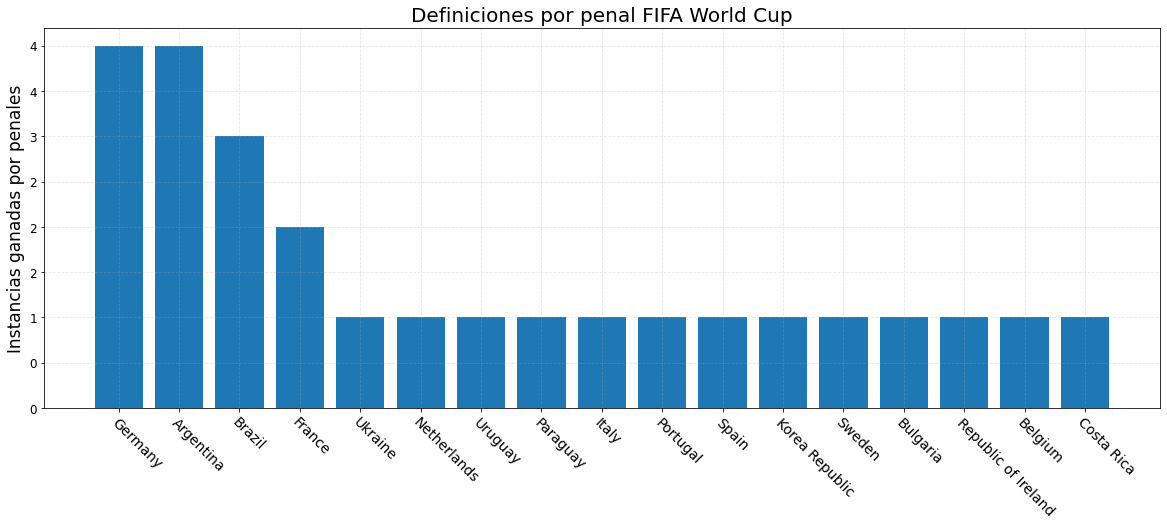

In [ ]:
from matplotlib.ticker import FormatStrFormatter

# Armo un diccionario para contar victorias y lo paso a DataFrame para ordenarlo
win_dict = {}

for win in df_penalty['Win conditions']:
  # Extraigo el nombre del país ganador
  winner = win.split('win')[0].strip()
  
  # Unifico las Alemanias
  if winner == 'Germany FR':
    win_dict['Germany'] = win_dict.get('Germany', 0) + 1
  else:
    # Agrego una victoria en la cuenta
    win_dict[winner] = win_dict.get(winner, 0) + 1

df_winner = pd.DataFrame.from_dict(win_dict, columns=['Number of wins'], orient='index')
df_winner.sort_values(by='Number of wins', ascending=False, inplace=True) 

# Graficamos nuestro ranking
fig, ax = plt.subplots(figsize=(20, 7))
ax.grid(linestyle='dashed', alpha=0.3)
ax.bar(df_winner.index,
       'Number of wins', 
       data=df_winner)
ax.set_title('Definiciones por penal FIFA World Cup', size=20)
ax.set_ylabel('Instancias ganadas por penales', size = 17)
ax.set_xticklabels(df_winner.index, size=14, rotation=-45 , ha='left', rotation_mode='anchor')
ax.tick_params(axis='y', which='major', labelsize=12)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

In [ ]:
# Agreguemos una columna las iniciales del ganador a df_penalty
lis = []
for index, row in df_penalty.iterrows():
  # Iniciales de ambos equipos
  home = row['Home Team Initials']
  away = row['Away Team Initials']
  
  # Iniciales del ganador del encuentro
  winner = row['Win conditions'].split('win')[0]
  initial = home if all(s.lower() in winner.lower() for s in home) else away
  
  # Lo guardamos en una lista
  lis.append(initial)

# Como hay ambiguedad en la definicion entre ARG e ITA corrijo a mano
lis[6] = 'ARG'
lis[14] = 'ESP'
df_penalty.insert(loc=len(df_penalty.columns), column='Winner', value=lis)

Para la segunda parte de esta consigna miramos el DataFrame df_players.

In [ ]:
df_players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [ ]:
# Me quedo solo con los arqueros
index = np.logical_or(df_players['Position'] == 'GK', df_players['Position'] == 'GKC')
df_gk = df_players[index]
print(df_gk['Position'].value_counts()) 

# Me quedo solo con los partidos que se definieron por penales
df_gk_penalty = df_gk[df_gk['MatchID'].isin(df_penalty['MatchID'])]

# Me quedo con los ganadores usando las iniciales de los equipos
# Para eso añado la columna Winner y la comparo con Team Initials
df_gk_penalty = df_gk_penalty.merge(df_penalty[['MatchID', 'Winner']], how='right', on=['MatchID'])

#index = np.logical_and(df_gk_penalty['Team Initials'] == df_gk_penalty['Winner'], df_gk_penalty['Line-up'] == 'S')
df_gk_penalty = df_gk_penalty[df_gk_penalty['Team Initials'] == df_gk_penalty['Winner']] 
df_gk_penalty.drop_duplicates(inplace=True)


GK     2441
GKC     192
Name: Position, dtype: int64


Para decidir entre arqueros, miro los tipos de eventos que hay. Me quedo con el último cambio. En caso de no haber cambios, me quedo con el titular.

In [ ]:
df_gk_penalty['Event'].value_counts()

Y110'    1
O120'    1
I120'    1
Y90'     1
Name: Event, dtype: int64

Como solo hay un ingreso (Van Gaal cambiando de arquero a último minuto en el 2014), hago el cambio a mano. Para el resto saco los suplentes.

In [ ]:
# Tiro los arqueros de NED 
df_gk_penalty.drop(index=[85, 87],inplace=True)

# Me quedo con los titulares
index = df_gk_penalty['Line-up'] == 'S'

# Vuelvo a agregar al suplente de NED
index.loc[89] = True
df_gk_penalty = df_gk_penalty[index] 
df_gk_penalty.head(10)

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event,Winner
0,295,914,FRG,DERWALL Jupp (GER),S,1,Harald SCHUMACHER,GK,NaN,FRG
3,714,440,FRA,MICHEL Henri (FRA),S,1,Joel BATS,GK,NaN,FRA
4,714,575,FRG,BECKENBAUER Franz (GER),S,1,Harald SCHUMACHER,GK,NaN,FRG
7,714,421,BEL,THYS Guy (BEL),S,1,Jean Marie PFAFF,GK,NaN,BEL
8,323,248,IRL,CHARLTON Jack (ENG),S,1,Pat BONNER,GK,NaN,IRL
11,751,31,ARG,BILARDO Carlos (ARG),S,12,Sergio GOYCOCHEA,GK,NaN,ARG
13,3464,28,ARG,BILARDO Carlos (ARG),S,12,Sergio GOYCOCHEA,GK,NaN,ARG
19,3464,159,FRG,BECKENBAUER Franz (GER),S,1,Bodo ILLGNER,GK,NaN,FRG
22,338,3092,BUL,PENEV Dimitar (BUL),S,1,Borislav MIHAYLOV,GKC,NaN,BUL
24,796,3095,SWE,SVENSSON Tommy (SWE),S,1,Thomas RAVELLI,GK,NaN,SWE


Ahora contamos los valores para armar nuestro Ranking. Como vemos el primer puesto es compartido por Schumacher de Alemania, Goycochea de Argentina y Taffarel de Brasil.

In [ ]:
ranking = df_gk_penalty['Player Name'].value_counts()
print(ranking)

Harald SCHUMACHER    2
Sergio GOYCOCHEA     2
TAFFAREL             2
SHOVKOVSKYI          1
KRUL                 1
ROMERO               1
JULIO CESAR          1
MUSLERA              1
J. VILLAR            1
BUFFON               1
RICARDO              1
LEHMANN              1
CASILLAS             1
W J LEE              1
Joel BATS            1
Fabien BARTHEZ       1
Carlos ROA           1
Thomas RAVELLI       1
Borislav MIHAYLOV    1
Bodo ILLGNER         1
Pat BONNER           1
Jean Marie PFAFF     1
NAVAS K.             1
Name: Player Name, dtype: int64


### Tercer Consigna

Vamos a construir un histograma de la distribución de goles a lo largo del partido. Para eso usamos los datos del campo "Event", y nos quedamos con los eventos GX', PX' y WX'.

In [ ]:
# Tiramos los datos de jugadores sin eventos
df_goals = df_players.dropna(subset=['Event'])

# Chequeamos que no hayan otro tipo de datos faltantes
index = df_goals['Event'].map(lambda x: not x.startswith(('R', 'P', 'Y', 'I', 'O', 'W', 'G', 'M')))
df_goals.loc[index, 'Event'].value_counts()

Series([], Name: Event, dtype: int64)

Tiramos las filas con códigos que nos nos interesan.

In [ ]:
# Tiramos las filas sin goles
df_goals = df_goals.loc[
           df_goals['Event'].map(lambda x: any(ch in x for ch in ('G', 'P', 'W')))
           ]

# En las filas que quedan, tiramos los eventos que no sean goles
def only_goals(string):
  '''Retira los eventos que no sean goles'''
  res = []

  for event in string.split():
    if event.startswith(('G', 'P', 'W')):
      res.append(event)

  return ' '.join(res)

df_goals.loc[:, 'Event'] = df_goals['Event'].apply(only_goals)
df_goals


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
6,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Andre MASCHINOT,NaN,G43' G87'
14,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Lucien LAURENT,NaN,G19'
35,201,1090,USA,MILLAR Bob (USA),S,0,Tom FLORIE,C,G45'
...,...,...,...,...,...,...,...,...,...
37631,255955,300186474,GER,LOEW Joachim (GER),N,9,SCH�RRLE,NaN,G69' G79'
37701,255957,300186502,NED,Louis VAN GAAL (NED),S,5,BLIND,NaN,G17'
37705,255957,300186502,NED,Louis VAN GAAL (NED),S,9,V. PERSIE,C,P3'
37713,255957,300186502,NED,Louis VAN GAAL (NED),S,20,WIJNALDUM,NaN,G90'


Usando RoundID agregamos una columna que distinga entre fase de grupos y eleminatoria.

In [ ]:
# Para eso añado la columna Winner y la comparo con Team Initials
df_goals = df_goals.merge(df_matches[['MatchID','Stage']], how='left', on=['MatchID'])
df_goals['Stage'] = df_goals['Stage'].apply(lambda x: 'Group' if x.startswith('Group') else 'Playoffs') 

# Y eliminamos posibles eventos vacios que hayn quedado o se hayan agregado
df_goals = df_goals[df_goals['Event'].map(lambda x: '' in x and x.startswith(('G','W', 'P')))]
df_goals.drop_duplicates(inplace=True)
df_goals.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event,Stage
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40',Group
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70',Group
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Andre MASCHINOT,NaN,G43' G87',Group
3,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Lucien LAURENT,NaN,G19',Group
4,201,1090,USA,MILLAR Bob (USA),S,0,Tom FLORIE,C,G45',Group


Con los datos limpios armamos dos listas con los minutos en que se anotaron los goles, tanto para fase de grupos como para fase eliminatoria.

In [ ]:
from re import sub 

# Inicializo un dicionario para guardar los goles separando por fase
goals_minutes = dict()

# Itero sobre el dataset guardando los minutos de los goles
for idx, row in df_goals.iterrows():
  # Info de la fase y eventos
  stage = row['Stage']
  event = row['Event']

  # Limpio los goles para quedarme solo con los minutos
  goals = [int(sub('[^0-9]', '', ch)) for ch in event.split()]

  # Guardo usando el stage como key
  goals_minutes[stage] = goals_minutes.get(stage, [0]) + goals

print(len(goals_minutes['Group']))
print(len(goals_minutes['Playoffs']))

1692
689


Grafiquemos lo que obtuvimos en un histograma para todos los partidos y luego separemos en fases de grupo y eliminación directa.

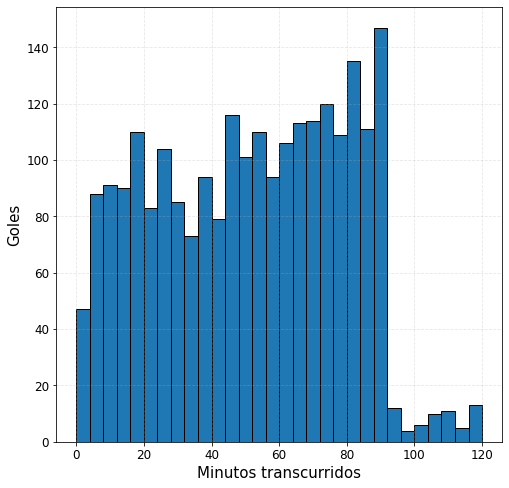

In [ ]:
# Nuestros datos para todos los partidos juntos
data = goals_minutes['Group'] + goals_minutes['Playoffs']

# nuestros bines van a ser de 4 minutos
binwidth = 4

fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.hist(data, bins=range(min(data), max(data) + binwidth, binwidth), ec='black')
ax.set_xlabel('Minutos transcurridos', size=15)
ax.set_ylabel('Goles', size=15)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(linestyle='dashed', alpha=0.3)

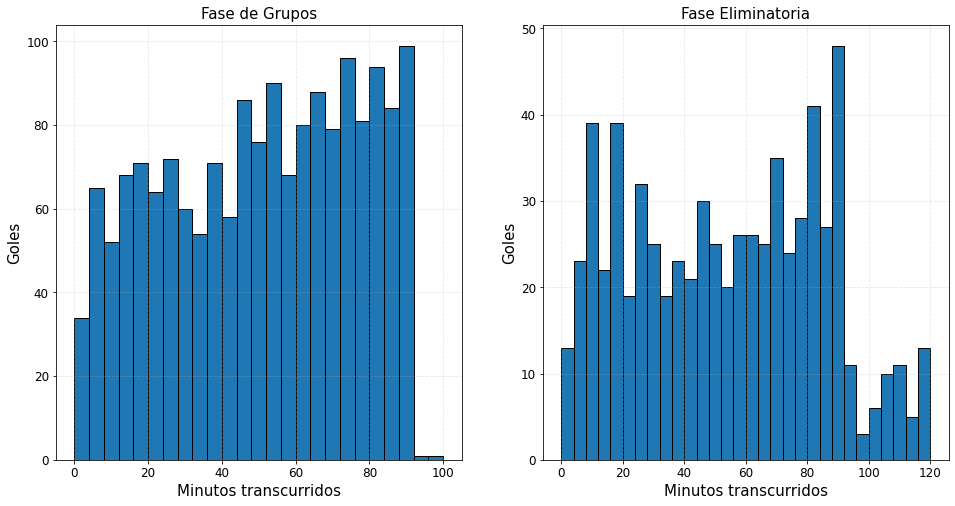

In [ ]:
# Datos por separado para grupos y elminación
data_groups = goals_minutes['Group']
data_playoff = goals_minutes['Playoffs']

# Tamaño de bines
binwidth = 4

fig, ax = plt.subplots(1, 2, figsize=(16,8))
# Grupos
ax[0].hist(data_groups,  
           bins=range(min(data_groups), max(data_groups) + binwidth, binwidth),
           ec='black')
ax[0].set_xlabel('Minutos transcurridos', size=15)
ax[0].set_ylabel('Goles', size=15)
ax[0].set_title('Fase de Grupos', size=15)
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[0].grid(linestyle='dashed', alpha=0.3)

# Fase eliminatoria
ax[1].hist(data_playoff, 
           bins=range(min(data_playoff), max(data_playoff) + binwidth, binwidth),
           ec='black')
ax[1].set_xlabel('Minutos transcurridos', size=15)
ax[1].set_ylabel('Goles', size=15)
ax[1].set_title('Fase Eliminatoria', size=15)
ax[1].tick_params(axis='both', which='major', labelsize=12)
ax[1].grid(linestyle='dashed', alpha=0.3)

Podemos ver que en el minuto 90 las cosas se ponen intensas, sobre todo en la fase eliminatoria, donde hay casi el doble de goles que el promedio. También se ven picos al final del primer tiempo - comienzo del segundo. Este mismo comportamiento se replica, a menor escala, en el alargue donde hay picos al final de cada tiempo.

### Consigna 4 

Buscamos el tiempo transcurrido hasta el primer gol y en partidos con más de un gol, el tiempo transcurrido entre goles.

Nuevamente usamos df_goals agrupando por partido, pero esta vez solo guardamos el minuto del primer gol y las diferencias de tiempo entre goles.
(Podría haber hecho esto mismo en el item anterior agregando la columna Stage y medio que lo hice bastante más complicado. Aprendí sobre la marcha.)

In [ ]:
# Agrupamos por partido y juntamos todos los goles en una lista
df_minutes = df_goals.groupby('MatchID')['Event'].apply(list)

# Separamos en la lista los eventos de más de un gol
df_minutes = df_minutes.apply(lambda lis: ' '.join(lis).split())

# Nos quedamos solo con los minutos y ordenamos la lista
df_minutes = df_minutes.apply(lambda x: [int(sub('[^0-9]', '', ch)) for ch in x])
df_minutes = df_minutes.apply(sorted)
df_minutes

MatchID
25                                   [81]
26                                   [67]
27                                   [85]
28                               [17, 67]
29                               [62, 68]
                         ...             
300186510        [27, 44, 53, 65, 72, 80]
300186511                            [29]
300186512                     [1, 82, 86]
300186513                    [35, 37, 50]
300186514    [17, 18, 40, 67, 73, 81, 87]
Name: Event, Length: 766, dtype: object

Armo dos listas con los datos a graficar: una para primeros goles y otra para las diferencias entre goles.

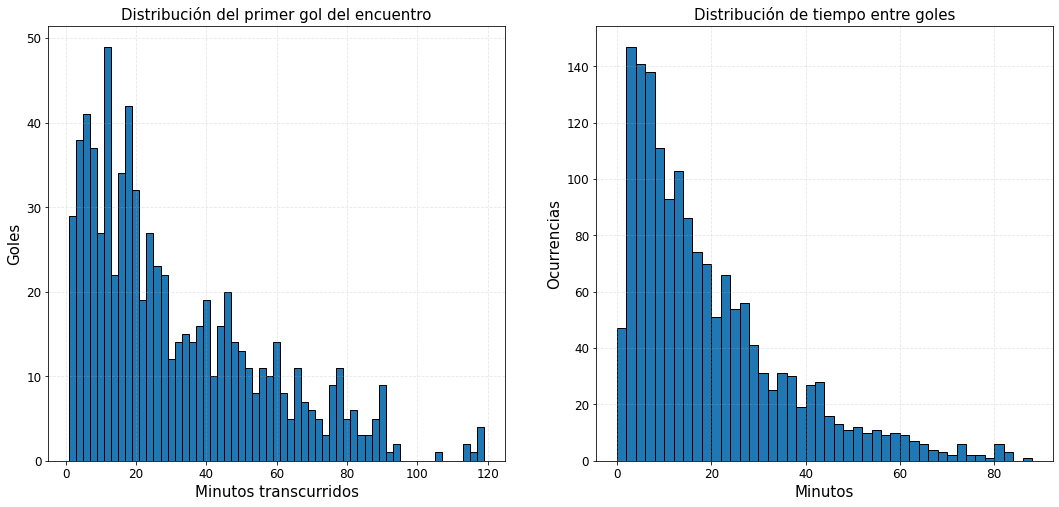

In [ ]:
from functools import reduce
# Creo dos listas con los datos necesarios
# Para la primera solo me quedo con el primer elemento de cada evento
data_first_goal = list(df_minutes.apply(lambda x: x[0]))

# Primero filtro los eventos con más de un gol y calculo el diferencial. 
data_dtime_goals = df_minutes[df_minutes.apply(lambda x:  len(x)>1)].apply(lambda x: list(np.diff(x)))

# Concateno en una sola lista
data_dtime_goals = reduce(lambda acc, x: acc + x, data_dtime_goals)

# Graficamos los que obtuvimos
# Tamaño de bines
binwidth = 2

fig, ax = plt.subplots(1, 2, figsize=(18,8))
# Primer Gol
ax[0].hist(data_first_goal,  
           bins=range(min(data_first_goal), max(data_first_goal) + binwidth, binwidth),
           ec='black')
ax[0].set_xlabel('Minutos transcurridos', size=15)
ax[0].set_ylabel('Goles', size=15)
ax[0].set_title('Distribución del primer gol del encuentro', size=15)
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[0].grid(linestyle='dashed', alpha=0.3)

# Tiempo entre goles
ax[1].hist(data_dtime_goals, 
           bins=range(min(data_dtime_goals), max(data_dtime_goals) + binwidth, binwidth),
           ec='black')
ax[1].set_xlabel('Minutos', size=15)
ax[1].set_ylabel('Ocurrencias', size=15)
ax[1].set_title('Distribución de tiempo entre goles', size=15)
ax[1].tick_params(axis='both', which='major', labelsize=12)
ax[1].grid(linestyle='dashed', alpha=0.3)

Ambos histogramas parecen ser los generados por una distribución de probabilidad exponencial -sobre todo en el caso del tiempo entre goles-. Dibujemos arriba una exponencial con la media y varianza correspodiente a cada histograma.

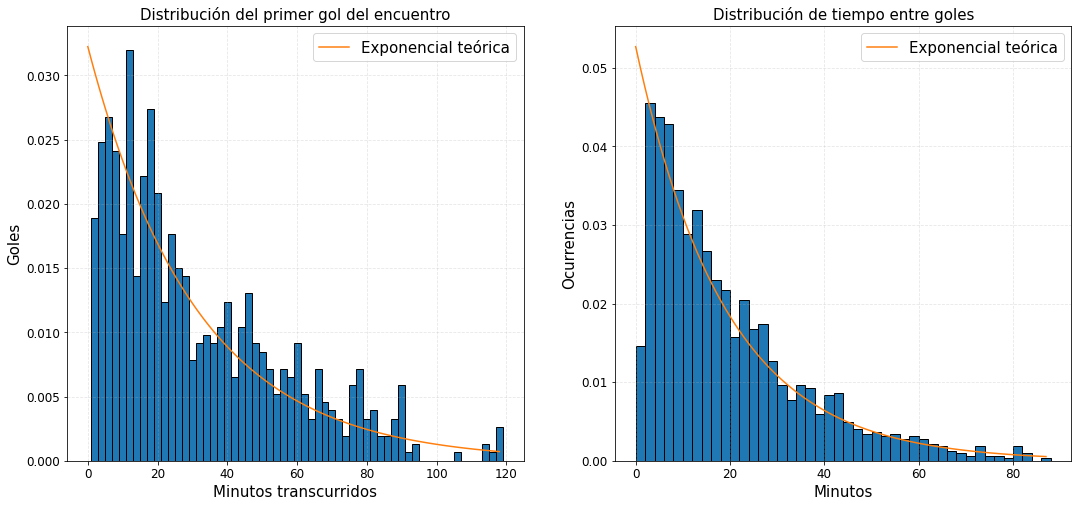

In [ ]:
from scipy import stats
# Media y desviación primer gol
mean_first = np.mean(data_first_goal)
std_first = np.std(data_first_goal)

pdf_first = stats.expon.pdf(range(max(data_first_goal)), scale=mean_first)

# Media y desviación primer gol
mean_dtime = np.mean(data_dtime_goals)
std_dtime = np.std(data_dtime_goals)

pdf_dtime = stats.expon.pdf(range(max(data_dtime_goals)), scale=mean_dtime)

# Graficamos los que obtuvimos
# Tamaño de bines
binwidth = 2

fig, ax = plt.subplots(1, 2, figsize=(18,8))
# Primer Gol
ax[0].hist(data_first_goal,  
           bins=range(min(data_first_goal), max(data_first_goal) + binwidth, binwidth),
           ec='black', density=True)
ax[0].plot(range(max(data_first_goal)), pdf_first, label='Exponencial teórica')
ax[0].set_xlabel('Minutos transcurridos', size=15)
ax[0].set_ylabel('Goles', size=15)
ax[0].set_title('Distribución del primer gol del encuentro', size=15)
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[0].legend(loc='best', fontsize=15)
ax[0].grid(linestyle='dashed', alpha=0.3)

# Tiempo entre goles
ax[1].hist(data_dtime_goals, 
           bins=range(min(data_dtime_goals), max(data_dtime_goals) + binwidth, binwidth),
           ec='black', density=True)
ax[1].plot(range(max(data_dtime_goals)), pdf_dtime, label='Exponencial teórica')
ax[1].set_xlabel('Minutos', size=15)
ax[1].set_ylabel('Ocurrencias', size=15)
ax[1].set_title('Distribución de tiempo entre goles', size=15)
ax[1].tick_params(axis='both', which='major', labelsize=12)
ax[1].legend(loc='best', fontsize=15)
ax[1].grid(linestyle='dashed', alpha=0.3)



Estos últimos gráficos nos dejan claro el caracter exponencial de ambas distribuciones. Si no viste goles para los primeros 30 minutos, la probabilidad de que vayas a ver alguno se redujo en dos tercios aprox. 